In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


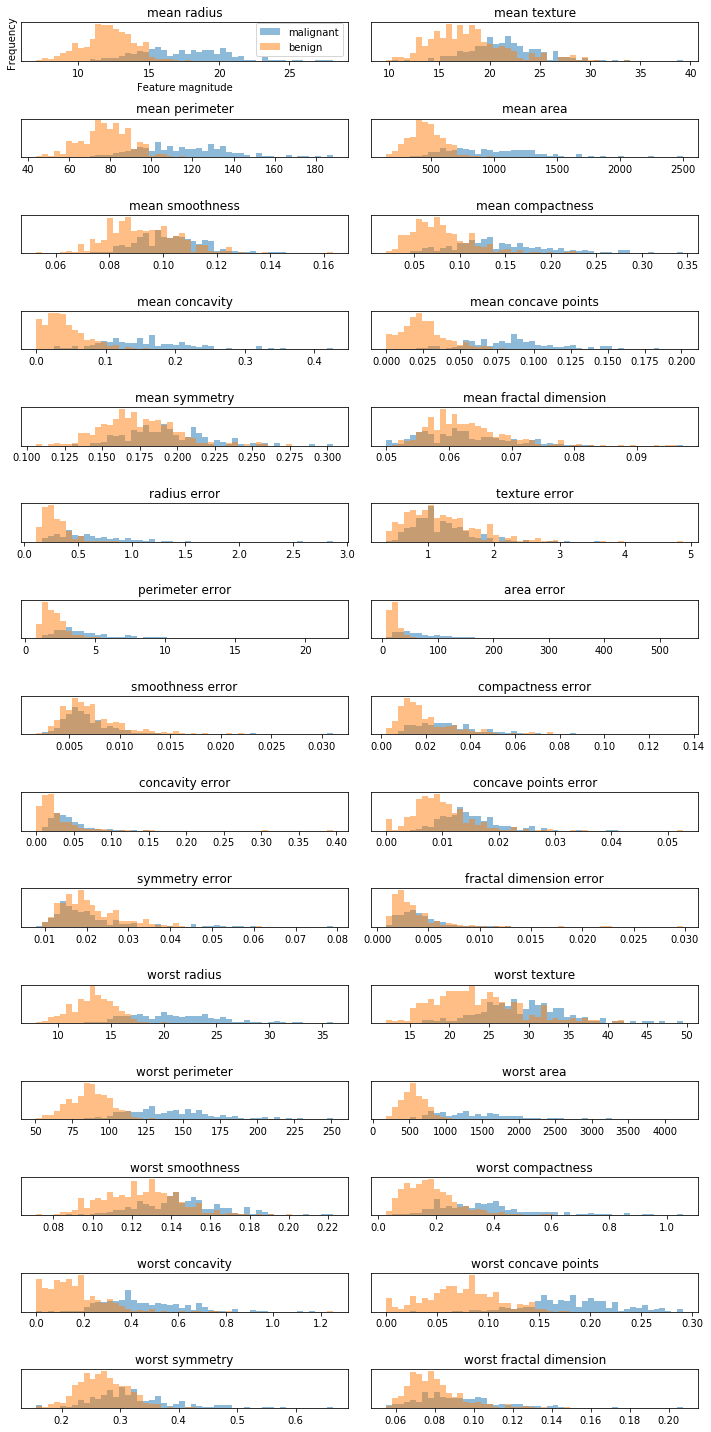

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    f, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

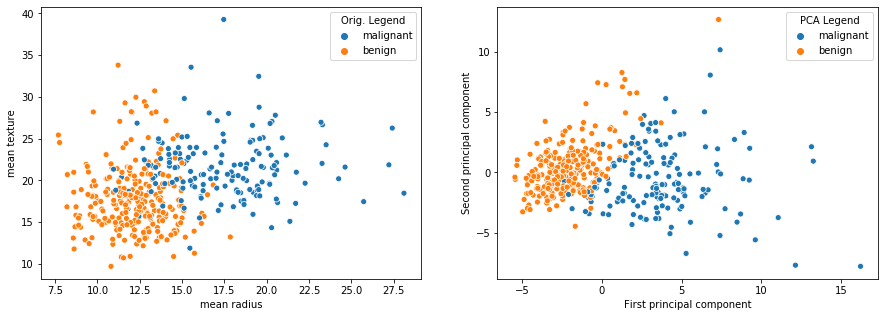

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42)

pipe = make_pipeline( StandardScaler(),PCA(n_components=2) )
pipe.fit(X_train)
X_pca = pipe.transform(X_train)

fig = plt.figure(figsize=(15,5)) 

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

g_o =   sns.scatterplot( x=X_train[:, 0], y=X_train[:, 1], hue=y_train, ax = ax1);
g_pca = sns.scatterplot( x=X_pca[:, 0],   y=X_pca[:, 1],   hue=y_train, ax = ax2);

leg_handles = g_o.get_legend_handles_labels()[0]

g_o.legend(leg_handles, cancer.target_names, title='Orig. Legend')
g_pca.legend(leg_handles, cancer.target_names, title='PCA Legend')

ax1.set(xlabel = "mean radius", ylabel = "mean texture")
ax2.set(xlabel = "First principal component", ylabel = "Second principal component")
plt.show()


In [5]:
# Еще раз !!!! ЭТО  ВАЖНО !!! РАЗМЕРНОСТЬ
pca = pipe.named_steps['pca']
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [6]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21606219  0.10256791  0.22510819  0.21883451  0.14804204  0.23928857
   0.25918989  0.26246319  0.15070222  0.06038287  0.20440268  0.03117209
   0.20946517  0.19911163  0.02674616  0.16680985  0.15709119  0.18483612
   0.05078459  0.10095405  0.22574568  0.10634565  0.23560393  0.2235323
   0.13033081  0.20797412  0.23176851  0.25148098  0.12500401  0.12505041]
 [-0.23826294 -0.05282173 -0.22045406 -0.23448566  0.17369883  0.15545513
   0.0588006  -0.03833648  0.17583295  0.3635054  -0.1148424   0.09281816
  -0.09424561 -0.15653968  0.19724414  0.23628718  0.20051477  0.13534311
   0.15495272  0.28774197 -0.22335781 -0.03836196 -0.20240362 -0.22167808
   0.16714483  0.15270009  0.0983546  -0.00333393  0.11991076  0.28721882]]


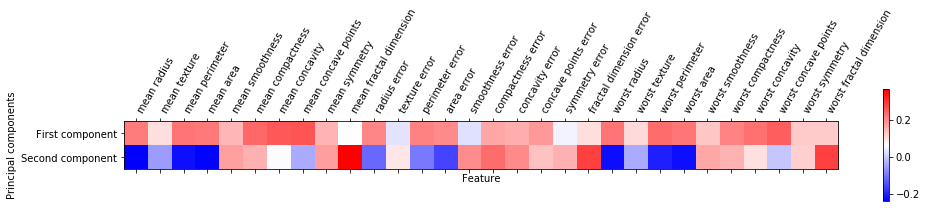

In [7]:
plt.matshow(pca.components_, cmap='bwr')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

<BarContainer object of 2 artists>

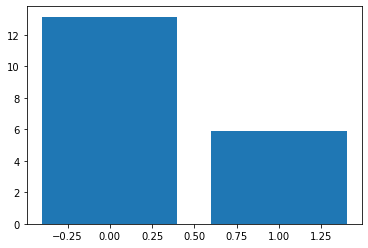

In [8]:
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_)

<BarContainer object of 30 artists>

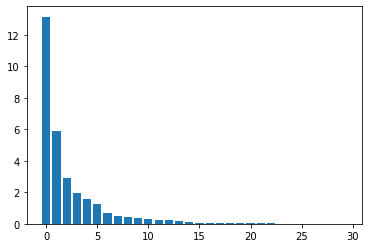

In [9]:
pipe = make_pipeline( StandardScaler(),PCA() )
pipe.fit(X_train)
########################
pca = pipe.named_steps['pca']
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_)

In [10]:
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime
import time
# Отличие только в скорости, так бывает, а почему кстати?

start_time = datetime.now()
pipe     = make_pipeline( RandomForestClassifier(n_estimators = 500, random_state=42 ))
pipe.fit(X_train,y_train)
score = pipe.score(X_test, y_test)
print('без pca:',score)
print('время:',datetime.now() - start_time)

print()

start_time = datetime.now()
pipe_pca = make_pipeline( StandardScaler(),PCA(n_components=5),RandomForestClassifier(n_estimators = 500, random_state=42))
pipe_pca.fit(X_train,y_train)
score = pipe_pca.score(X_test, y_test)
print('с pca:', score)
print('время:',datetime.now() - start_time)



без pca: 0.965034965034965
время: 0:00:00.680741

с pca: 0.965034965034965
время: 0:00:00.595249
